# The Hausdorff dimension of the boundaries of self-avoiding plane-filling square-grid folding curves

**Author**: O M Fagbile

**Abstract**: We use Verrill’s substitution map introduced in the 2025 paper [1] to show that the boundary of the square-grid folding curve generated by a self-avoiding, plane-filling folding sequence is the attractor of a graph-directed iterated function system satisfying the open set condition. Following the framework of Mauldin-Williams [4], we analyse the order structure of the graph directing the construction of the boundary in a few examples, and use this to compute the Hausdorff dimension.

## 1. Introduction: Heighway's dragon

First, we load useful Python modules (see [9] for information on our `foldingcurves` package).

In [1]:
import os
from IPython.display import display, Markdown, Latex, SVG
from foldingcurves.squaregrid import FoldingSequence, draw_sqauregrid_word, draw_midgrid_word, save_canvas_svg, end_squaregrid_word
from foldingcurves.IFS import GraphDirectedIFS
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

x = sp.symbols('x') # a symbolic variable for use in SymPy expressions
# for working in R^2
d = 2 
R = np.array([[0, -1], [1, 0]]) # 90 degrees counterclockwise rotation
R_inv = np.array([[0, 1], [-1, 0]]) # 90 degrees clockwise rotation
zero = np.array([0, 0])
e1 = np.array([1, 0])
e2 = np.array([0, 1])

### 1.1. Context: Verrill's algebraic framework

We call a word $\sigma = \sigma_1 \sigma_2 \dots \sigma_{m-1}$ in the free monoid $\{\texttt{+}, \texttt{-}\}^*$ a **folding sequence** (or paperfolding sequence). As the name suggests, such a word instructs one on how to fold a horizontal strip of paper. Here, we take $\texttt{+}, \texttt{-}$ to encode folds along the top and bottom of the strip respectively, such that the resulting creases and endpoints are equally spaced.

Following the approach of Arndt and Handl [8] and Verrill [1], let $\Omega_0 = \{\texttt{A}, \texttt{B}, \texttt{+}, \texttt{-}\}$, and $\texttt{Invert}$ be the involutive anti-endomorphism of $\Omega_0^*$ defined by 
$$\texttt{Invert}(\texttt{A}) = \texttt{B}, \quad \texttt{Invert}(\texttt{B}) = \texttt{A}, \quad \texttt{Invert}(\texttt{+})=\texttt{-}, \quad 
\texttt{Invert}(\texttt{-}) = \texttt{+}.$$ Anti-endomorphism means that $\texttt{Invert}(\texttt{w}_0\texttt{w}_1) = \texttt{Invert}(\texttt{w}_1)\texttt{Invert}(\texttt{w}_0)$ for $\texttt{w}_i \in \Omega_0^*$ and involutive means that $\texttt{Invert}^2(\texttt{w}) = \texttt{w}$. Geometrically, the letters $\texttt{A}$ and $\texttt{B}$ encode edges of the square grid (or square tiling) in orthogonal directions while $\texttt{+}$ and $\texttt{-}$ indicate right and left turns respectively. Thus, a word $\texttt{w}$ of the form 
$$\texttt{w}=X_1 \sigma_1 X_2 \sigma_2 X_3 \dots \sigma_{m-1} X_m, \quad \text{such that } X_j \in \{\texttt{A},\texttt{B}\}, \quad X_{j+1} \neq X_{j}, \tag{1}$$
can be interpreted using turtle graphics, as summarised in the table below. The $\texttt{Invert}$ operation corresponds to traversing the walk in the reverse direction, from its endpoint back to its start point.

|Letters| Turtle instruction |
|--|--|
|$\texttt{A},\texttt{B}$ | Move forward one unit|
|$\texttt{+}$ | Turn right $90^\circ$ |
|$\texttt{-}$ | Turn left $90^\circ$ |

We use $\mathcal{C}(\texttt{w})\subset\mathbb{R}^2$ to denote the piecewise linear curve traced by the turtle starting at the origin, and $\text{end}(\texttt{w})$ to denote the turtle's endpoint. This $\mathcal{C}:\Omega_0^* \to 2^{{\mathbb{R}}^2}$ corresponds to $\tilde{\mathcal{C}}$ in Definition 3 of [1] and $K$ in Dekking's paper [2]. Here,  we will use $\tilde{\mathcal{C}}(\texttt{w})$ to refer to the same curve but with rounded corners. Taking $X_1 =A$, the curve $\mathcal{C}(\texttt{w})$ is the curve we obtain when we unfold our strip so that the creases form right-angles . 

Iteratively folding according to $\sigma$ corresponds to iterating an associated endomorphism $P_\sigma$ of $\Omega_0^*$, where $P_{\sigma}(\texttt{A})$ is the word $\texttt{w}$ in $(1)$ with $X_1 = \texttt{A}$ and $P_{\sigma}(\texttt{B}) = \texttt{Invert}(P_{\sigma}(\texttt{A})).$ The last condition reflects the fact that when we unfold a strip of paper that has been folded in half, the right half of the strip is a rotation of the first half. We refer to $P_\sigma$ as the **folding morphism** associated with $\sigma$.

Let $L_\sigma$ be the unique compostion of rotation and scaling taking the columnn vector $(1,0)^t$ to $\text{end}(P_\sigma(\texttt{A}))$. We will call $L_\sigma^{-i}\mathcal{C} \left( P_\sigma^i(\texttt{A}) \right)$ the $i$th square-grid folding curve generated by $\sigma$. This sequence of compact sets is Cauchy with respect to Hasudorff metric. By the completeness of the metric space of non-empty compact subsets of $\mathbb{R}^2$ equipped with the Hausdorff metric, this sequence of sets converges to a compact set that we refer to as the **square-grid folding curve** generated by $\sigma$ (see Theorem 2.4 of [5], cf. [p. 69, 4]). For example, **Heighay's dragon**, which we visualise below, is the square-grid folding curve generated by $2$-folding (the square-grid folding curve generated by $\sigma = \texttt{+}$) and is perhaps the best known example of the class of curves we consider.

In [2]:
#ensure folder exists
outdir = "output/example1"
os.makedirs(outdir, exist_ok=True)

# define folding sequence
s = FoldingSequence('+')

# print the associated folding morphism
display(Latex('The associated folding morphishm:'))
for a in ["A", "B"]:
    rhs = "".join(s.folding_morphism(a))
    display(Latex(f"$\\texttt{{{a}}}\mapsto\\texttt{{{rhs}}}$")) # e.g. A \mapsto A+B
print("\n")

#render curve of iterates of folding morphism as SVG files
iter_list = [0,1,2,3,5,7,10] # iterations to display
filenames1, filenames2 = [], [] # collect the rendered SVG paths
step = 30 # length of forward one step
width = 1 # pen width
rounded_corners = 0.2 # turning radius as fraction of step
w = 'A' #axiom
for i in iter_list:
    filename1 = f"{outdir}/{i}rounded.svg"
    filename2 = f"{outdir}/{i}scaled.svg"
    draw_sqauregrid_word(w, step=step, rounded_corners=rounded_corners, label=(i<=5))
    save_canvas_svg(filename=filename1)
    s.turtledraw_foldingcurve(i, step=step, curve_width = width, draw_boundary=False, filename=filename2, rounded_corners=0)
    filenames1.append(filename1)
    filenames2.append(filename2)
    w = s.folding_morphism(w) #apply folding morphism

# display in Markdown table
header = "| $i=$ " + "".join(f"| ${i}$" for i in iter_list) + "|\n"
sep = "|" + "|".join(["---"] * (len(iter_list)+1)) + "|\n"
row1 = "| $\\tilde{{\mathcal{C}}}(P_\sigma^{{i}} (\\texttt{A}))$ " + "".join(f"| ![]({f}) " for f in filenames1) + "|\n"
row2 = "| $L_\sigma^{-i}\mathcal{C}(P_\sigma^i (\\texttt{A})))$ " + "".join(f"| ![]({f}) " for f in filenames2) + "|\n"

print("Iterates:")
md = header + sep + row1 + row2
display(Markdown(md))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>



Iterates:


| $i=$ | $0$| $1$| $2$| $3$| $5$| $7$| $10$|
|---|---|---|---|---|---|---|---|
| $\tilde{{\mathcal{C}}}(P_\sigma^{{i}} (\texttt{A}))$ | ![](output/example1/0rounded.svg) | ![](output/example1/1rounded.svg) | ![](output/example1/2rounded.svg) | ![](output/example1/3rounded.svg) | ![](output/example1/5rounded.svg) | ![](output/example1/7rounded.svg) | ![](output/example1/10rounded.svg) |
| $L_\sigma^{-i}\mathcal{C}(P_\sigma^i (\texttt{A})))$ | ![](output/example1/0scaled.svg) | ![](output/example1/1scaled.svg) | ![](output/example1/2scaled.svg) | ![](output/example1/3scaled.svg) | ![](output/example1/5scaled.svg) | ![](output/example1/7scaled.svg) | ![](output/example1/10scaled.svg) |


There are two astounding properties of the sequence of curves we obtain, namely that they are self-avoiding and plane-filling. In the 2012 paper [2], Dekking provides formal definitions and necessary conditions for these properties of folding sequences (cf. Definitions 6, 8 in [1]). For the remainder of this article, we will only consider folding sequences $\sigma$ that are self-avoiding and plane-filling. In the 2025 paper [1], Verill introduces a new way of describing the boundaries of the square-grid folding curves generated by such sequences which we breifly review (see $\S$ 4 & 5 of the reference).

For a word $\texttt{w}$ of the form in $(1)$, we can define an associated polyomino, denoted $\mathcal{P}(\texttt{w}) \subset \mathbb{R}^2$, which is the polygon formed by the union of squares whose diagonals are the edges in the path traced by $\texttt{w}$ (see Definition 7 in [1]). Verrill introduces a way of describing the boundary of this polyomino using a new alphabet $\Omega_{1} := \{\texttt{R}, \texttt{r}, \texttt{L}, \texttt{l}, \texttt{S}, \texttt{s}\}$. For this alphabet, $\texttt{Invert}$ is the involutive anti-endomorphism of $\Omega_1^*$ defined by $$\texttt{Invert}(\texttt{R}) = \texttt{l}, \quad \texttt{Invert}(\texttt{L}) = \texttt{r}, \quad \texttt{Invert}(\texttt{S}) = \texttt{S}, \quad \texttt{Invert}(\texttt{s}) = \texttt{s}.$$
The letters in $\Omega_1$ are interpreted using turtle graphics, with the case of the letter (upper or lower) indicating the parity of the starting square (even or odd, respectively). Their turtle instructions are summarized in the table below (a unit here is ${1}/{\sqrt{2}}$ times the length of an edge). Like earlier, we use $\mathcal{C}, \tilde{\mathcal{C}}: \Omega_0^* \to 2^{\mathbb{R}^2}$ to denote the curve traced by the turtle following a word in $\Omega_1^*$ with and without rounded corners respectively. 

|Letters| Turtle instruction |
|--|--|
| $\texttt{R},\texttt{r}$ | Move forward half a unit, turn right $90^\circ$, move forward half a unit |
| $\texttt{L},\texttt{l}$ | Move forward half a unit, turn left $90^\circ$, move forward half a unit |
| $\texttt{S},\texttt{s}$ | Move foward one unit |

Verrill provides an algorithm to construct a morphism, which we denote by $Q_\sigma$, from the original folding morphism $P_\sigma$. This new morphism $Q_{\sigma}$ is an endomorphism of $\Omega_{1}^*$ that describes the evolution of the boundary of the polyomino of $P_{\sigma}^{i}(\texttt{A})$ when $\sigma$ is self-avoiding and plane-filling, that is, for $i\geq 0$, the union of the curves $\mathcal{C}(Q_{\sigma}^i(\texttt{R}))$ and $\mathcal{C}(Q_{\sigma}^i(\texttt{L}))$, which we call the left and right boundaries respectively, form the complete boundary of $\mathcal{P}(P_\sigma^{i}(\texttt{A}))$ (see Theorem 1 in [1]). We refer to $Q_\sigma$ as the **boundary morphism** associated with $\sigma$. Like before, we demonstate this below with $\sigma=\texttt{+}$.

In [3]:
# print boundary morphism
display(Latex('The associated boundary morhpishm:'))
for a in ["R", "r", "L", "l", "S", "s"]:
    rhs = "".join(s.boundary_morphism(a))
    display(Latex(f"$\\texttt{{{a}}}\mapsto\\texttt{{{rhs}}}$"))
print("\n")

#render curve of iterates of folding morphism and their boundaries as SVG files
filenames1 = []
filenames2 = []
left_words = []
right_words = []
w = 'A' 
w_R = 'L'
w_L = 'R'
left_colour = '#ff6b6b' #red
right_colour = '#1e90ff' #blue
base_R = 45.0    # NE for right boundary
base_L = 315.0   # SE for left boundary
for i in iter_list:
    left_words.append(w_L)
    right_words.append(w_R)
    filename1 = f"{outdir}/{i}wBoundary.svg"
    filename2 = f"{outdir}/{i}scaledwBoundary.svg"
    draw_midgrid_word(w_L, step=step, initial_angle=base_R, pen_colour = left_colour, rounded_corners = rounded_corners, label=True)
    draw_midgrid_word(w_R, step=step, initial_angle=base_L, pen_colour = right_colour, rounded_corners = rounded_corners, label=True)
    draw_sqauregrid_word(w, step=step, rounded_corners = rounded_corners)
    save_canvas_svg(filename1)
    s.turtledraw_foldingcurve(i, step=step, curve_width=1, draw_boundary=True, filename=filename2, rounded_corners=0) 
    filenames1.append(filename1)
    filenames2.append(filename2)
    w = s.folding_morphism(w) # apply folding morphism of \sigma to w
    w_R = s.boundary_morphism(w_R)
    w_L = s.boundary_morphism(w_L)

# display in Markdown table
header = "| $i=$ " + "".join(f"| ${i}$" for i in iter_list) + "|\n"
sep = "|" + "|".join(["---"] * (len(iter_list)+1)) + "|\n"
row1 = "| $\\tilde{{\mathcal{C}}}(P_\sigma^i (\\texttt{A})) \cup \\tilde{{\mathcal{C}}}(Q_\sigma^i (\\texttt{R})) \cup \\tilde{{\mathcal{C}}}(Q_\sigma^i (\\texttt{L}))$ " + "".join(f"| ![]({f}) " for f in filenames1) + "|\n"
row2 = "| $L_\sigma^{-i}\mathcal{C}(P_\sigma^i (\\texttt{A})) \cup L_\sigma^{-i}\mathcal{C}(Q_\sigma^i (\\texttt{R})) \cup L_\sigma^{-i}\mathcal{C}(Q_\sigma^i (\\texttt{L}))$ " + "".join(f"| ![]({f}) " for f in filenames2) + "|\n"

display(Latex('Iterates with their left and right boundaries in red and blue respectively:'))
md = header + sep + row1 + row2
display(Markdown(md))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

| $i=$ | $0$| $1$| $2$| $3$| $5$| $7$| $10$|
|---|---|---|---|---|---|---|---|
| $\tilde{{\mathcal{C}}}(P_\sigma^i (\texttt{A})) \cup \tilde{{\mathcal{C}}}(Q_\sigma^i (\texttt{R})) \cup \tilde{{\mathcal{C}}}(Q_\sigma^i (\texttt{L}))$ | ![](output/example1/0wBoundary.svg) | ![](output/example1/1wBoundary.svg) | ![](output/example1/2wBoundary.svg) | ![](output/example1/3wBoundary.svg) | ![](output/example1/5wBoundary.svg) | ![](output/example1/7wBoundary.svg) | ![](output/example1/10wBoundary.svg) |
| $L_\sigma^{-i}\mathcal{C}(P_\sigma^i (\texttt{A})) \cup L_\sigma^{-i}\mathcal{C}(Q_\sigma^i (\texttt{R})) \cup L_\sigma^{-i}\mathcal{C}(Q_\sigma^i (\texttt{L}))$ | ![](output/example1/0scaledwBoundary.svg) | ![](output/example1/1scaledwBoundary.svg) | ![](output/example1/2scaledwBoundary.svg) | ![](output/example1/3scaledwBoundary.svg) | ![](output/example1/5scaledwBoundary.svg) | ![](output/example1/7scaledwBoundary.svg) | ![](output/example1/10scaledwBoundary.svg) |


### 1.2. The graph self-similarity of the boundaries of self-avoiding plane-filling square-grid folding curves

Recall that a **similarity** on $\mathbb{R}^2$ of ratio $r>0$ is a map $T: \mathbb{R}^2 \to \mathbb{R}^2$ satisfying 
$$\Vert T(x) - T(y) \Vert = r\Vert x - y \Vert, \quad \text{for all }x,y\in \mathbb{R}^2.$$ 
Equivalently, $T: \mathbb{R}^2 \to \mathbb{R}^2$ is a similarity of ratio $r$ if and only if it has the form $$T(x) =  Ax+ b, \quad b\in \mathbb{R}^2, \quad A\in \mathbb{R}^{2 \times 2},$$ where $A$ is a composition of rotation or reflection and uniform scaling by a factor of $\pm r$. 

Let $G=(V,E,r)$ be a weighted directed multigraph, where the weight of any edge $e\in E$ is given by $r(e)$. Then a list $(T_e)_{e \in E}$ of similarities on $\mathbb{R}^2$, where each $T_e$ has ratio $r(e)$, is called an **iterated function system** (IFS) of similarities realising $G$ in $\mathbb{R}^2$. We say that $G$ is **strictly contracting** when its weights lie in the interval $(0,1)$. In this case, a fundamental result in *fractal geometry* is that there exists a unique vector of non-empty compact subsets $(K_u)_{u\in V}$ that satisfies the graph self-similarity equation $$(K_u)_{u\in V} = \left(\bigcup_{v\in V} \bigcup_{e\in E_{uv}} T_e (K_v) \right)_{u\in V},   $$where $E_{uv}$ denotes the subset of edges that go from $u$ to $v$. The space of vectors of non-empty compact sets equipped with the supremum Hausdorff metric form a complete metric space. The existence and uniqueness of this vector are guaranteed by the *contraction mapping principle*: the unique fixed point is the limit obtained by iteratively applying a contraction, built from $(T_e)_{e \in E}$, to any initial vector of non-empty compact sets (see [Theorem 4.3.5, 4], [Theorem 1, 3]). Hence the list $(K_u)_{u\in V}$ is called the **attractor** of the IFS, and the sets $K_u$ are said to be **graph self-similar**.

Let $u\in \Omega_1$. By Theorem 2.4 of [5], the sequence of compact sets $L_\sigma^{-i} \mathcal{C}\left(Q_\sigma^i(u)\right)$ converges to a compact set, which we denote by $K_u$. Consider the word $Q_\sigma(u) = X_1 X_2 \dots X_n$. There exists compositions of rotations and translations $I_j$ such that $$\mathcal{C}\left(Q_\sigma(u)\right) = \bigcup_{j=1}^{n}   I_j \left(\mathcal{C}\left(Q_\sigma(X_j)\right) \right).$$ By induction, $$\mathcal{C}(Q_{\sigma}^{i+1}(u)) = \bigcup_{j=1}^{n} I_{j}(\mathcal{C}(Q_{\sigma}^{i}(X_j))),$$and so applying $L_{\sigma}^{-i}$ yields 
\begin{equation*}
    L_{\sigma}L_{\sigma}^{-i-1}\mathcal{C}(Q_{\sigma}^{i+1}(u)) = \bigcup_{v\in \Omega_1} \bigcup_{e \in E_{uv}}  I_j \left( L_{\sigma}^{-i}\mathcal{C}(Q_{\sigma}^{i}(u)) \right),
\end{equation*}
where $E_{uv} = \{1 \leq  j\leq n: X_j = v \}.$ 

Taking limits as $i \to 
\infty$ yields the following graph self-similarity equation $$L_{\sigma} K_u = \bigcup_{v\in \Omega_1} \bigcup_{j \in E_{uv}} I_j (K_v).$$

Moreover, from the definition of the boundary morphism, the rules for $\texttt{l}$ and $\texttt{r}$ are defined by inverting rules for $\texttt{R}$ and $\texttt{L}$ respectively, meaning that their curves are pairwise congruent. We can therefore describe the system using a graph on a smaller vertex set $V=\{\texttt{R}, \texttt{L}, \texttt{S}, \texttt{s}\}$, which we denote by $G_{\sigma}$. This graph is obtained by redirecting all edges that originally entered the vertices $\texttt{l}$ and $\texttt{r}$ in the graph on $\Omega_1$ to their uppercase counterparts, $\texttt{R}$ and $\texttt{L}$, respectively before deleting them. Note each edge has weight $1/\Vert\text{end}{P_{\sigma}}(\texttt{A}) \Vert$.

For example, we compute the graph self-similarity equation for the boundary of Heighway's dragon. First we define the curves reprsenting the symbols as follows.

<IPython.core.display.Latex object>

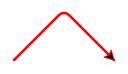

<IPython.core.display.Latex object>

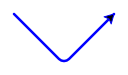

<IPython.core.display.Latex object>

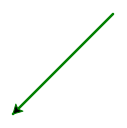

In [4]:
filename1 = "output/C(R).svg"
display(Latex("$\mathcal{C}(\\texttt{R})$ starts at $(0,0)$ and ends at $(1,0)$:"))
draw_midgrid_word('R', step = 100, initial_angle=45, rounded_corners = 0.05, pen_colour="red", arrow_head=True)
save_canvas_svg(filename1, reset_after = True)
display(SVG(filename1))

filename2 = "output/C(L).svg"
display(Latex("$\mathcal{C}(\\texttt{L})$ starts at $(0,0)$ and ends at $(1,0)$:"))
draw_midgrid_word('L', step = 100, initial_angle=-45, rounded_corners = 0.05, pen_colour="blue", arrow_head=True)
save_canvas_svg(filename2, reset_after = True)
display(SVG(filename2))

filename3 = "output/C(S).svg"
display(Latex("$\mathcal{C}(\\texttt{S}) = \mathcal{C}(\\texttt{s})$ starts at $(0,0)$ and ends at $(-1,-1)$:"))
draw_midgrid_word('S', step = 100, initial_angle=-135, rounded_corners = 0.05, pen_colour="green", arrow_head=True)
save_canvas_svg(filename3, reset_after = True)
display(SVG(filename3))

Thus we obtain the following graph-similarity equation (we do not consider $K_s$ as $\texttt{s}$ is neither reachable from $\texttt{R}$ nor $\texttt{L}$)
$$\begin{align*}
    L_\sigma K_R &= K_R \cup \left(R_{\pi/2}K_L + (1,-1)^t\right) \\
    L_{\sigma} K_L &= R_{\pi/2}K_{S} \\
    L_{\sigma} K_S &= R_{\pi}  K_R \cup (K_R + (-2,0)^t).
\end{align*}$$

We demonstrate below that we can generate the $K_v$ starting from an initial vector of sets solely containing the origin, following the contraction mapping principle.

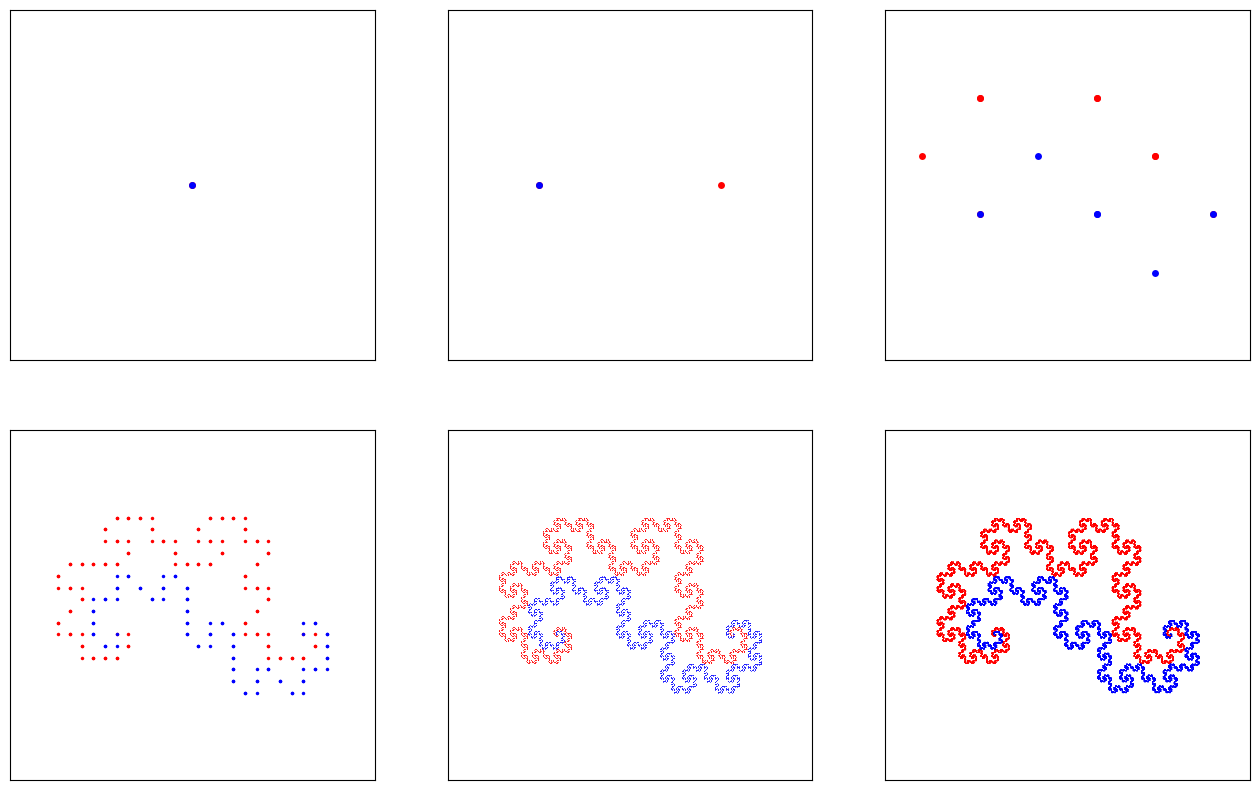

In [5]:
L = np.array([[1, 1], [-1, 1]])
L_inv = np.linalg.inv(L)

num_vertices = 3
edges = { 
    1: [(1, (L_inv, zero)),
        (2, (L_inv @ R, L_inv @ (e1-e2)))],
    2: [(3, (L_inv @ R, zero))],
    3: [(1, (L_inv @ R @ R , zero)),
        (1, (L_inv, L_inv @ (-2*e1)))]
}

dragon_boundary_IFS = GraphDirectedIFS(d, num_vertices, edges) 

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Plot iterations 0 to 5
markers = [100,100,100,25,1,0.05] # marker sizes
for i, ax in enumerate(axes):
    dragon_boundary_IFS.draw(vertex=1, iter=i**2, ax=ax, marker='.', s = markers[i], linewidths=0, color='red')
    dragon_boundary_IFS.draw(vertex=2, iter=i**2, ax=ax, marker='.', s = markers[i], linewidths=0, color='blue')
    ax.set_xticks([]); ax.set_yticks([])
    ax.margins(0.5)
    ax.axis('equal')

plt.show()
fig.savefig(f"{outdir}/graph-direct construction of Heighway's dragon boundary.jpg", dpi = 400, bbox_inches='tight') 

### 1.3. Content 

We are interested in calculating the Hausdorff dimension of the boundaries of square-grid folding curves generated by self-avoiding plane-filling folding sequences. The framework of graph-directed IFSs provides the tools for this calculation. In their 1988 paper [3], Mauldin and Williams study the Hausdorff dimension of such graph self-similar sets. We briefly review their key results below.

Let $G=(V,E,r)$ be a weighted directed multigraph as defined earlier. We introduce some defintions. For $s\geq 0$, let $A_G(s) \in \mathbb{R}^{V\times V}$ be the matrix whose $(u,v)$ entry is given by $$\sum_{e\in E_{uv}} r(e)^s.$$ We denote its **spectral radius** (maximum absolute value of eigenvalues) by $\rho(A(s))$. We say $G$ is **strongly connected** if for any two vertices $u,v$, there exists a path from $u$ to $v$ and vice versa. A graph consisting of a single vertex that is not looped to itself is not considered strongly connected. The **strongly connected components** (SCCs) of $G$ are the maximal subgraphs of $G$ that are strongly connected. Let $\mathrm{SC}(G)$ denote the set of SCCs of $G$. We introduce a partial order on $\mathrm{SC}(G)$ as follows: for $H_1, H_2 \in \mathrm{SC}(G)$, we say that $H_2$ is **accessible** from $H_1$ if there exists a path from a vertex in $H_1$ to a vertex in $H_2$. If either $H_1$ is accessible from $H_2$ or vice versa, we say that $H_1$ and $H_2$ are **comparable**.  

Suppose $G$ is strongly connected. Then the matrices $A(s)$ are non-negative and irreducible, and by Perron-Frobenius theorem, there exists a unique $\alpha_G \geq 0$ such that $\rho(A(\alpha_G))=1$ (see [Theorem 6.9.6, 4] for details). This value is what Edgar [4] calls the **sim-value** of $G$. Maudlin-Williams show that $\alpha_G$ is an upper bound for the Hausdorff dimension of the sets in its attractor with equality when the iterated function system realising $G$ satisfies the *open set condition* which we now recall (see [Theorem 6.7.2, 4], [Theorems 3, 3]). We say that an IFS $(T_e)_{e\in E}$ satisifes the **open set condition** if there exists a family of non-empty open sets $(U_u)_{u \in V}$ such that: for all $u,v\in V$ and $e\in E_{uv}$, we have the following containment $T_{e}(U_v) \subseteq U_u$; and for all $u,v,v'\in V$, $e\in E_{uv}$ and $e'\in E_{uv'}$ with $e\neq e'$, we have the following disjointness $$T_e(U_v) \cap T_{e'}(U_{v'}) = \emptyset.$$They show more strongly that under these hypotheses the $\alpha_G$-dimensional Hausdorff measure $\mathcal{H}^{\alpha_G}(K_v)$ is positive and finite, for $v\in V$. 
 
When the graph $G$ is not strongly connected, the measure of $K_v$ depends on the order structure of the SCCs of $G$, leading to the following result (see [Theorems 4 & 5, 3]).

>**Theorem 1**. For $u\in V$, let $$\alpha_u= \max \{ \alpha_H \mid  H \in SC(G) \text{ and $H$ is accessible from $u$}  \}.$$ Then the Hausdorff dimension of $K_u$ satisfies $\dim_H (K_u)  \leq \alpha_u$. If, in addition, the realisation satisfies the open set condition, then $\dim_H (K_u) = \alpha_u$. 

A priori, it is possible that $\mathcal{H}^{\alpha_u}(K_u)$ is zero or infinite. Mauldin-Williams show more strongly this value is positive and finite if and only if, in addition, the set $\{H \in \text{SC}(G) \mid \text{$H$ is accessible from $u$ and } \alpha_H = \alpha_u  \}$ consists incomparable elements.

For $u\in\Omega_1$, we set $U_u:=\operatorname{int}(K_u)$ to be the topological interior of the compact limiting set $K_u$, as defined in the previous subsection. We claim that the family of open sets $(U_u)_{u\in \Omega_1}$ witness the open set condition. The containment condition follows immediately from the graph self-similarity equation. The curves $\tilde{\mathcal{C}}(Q_{\sigma}(u))$ do not tranverse the same edge twice since Verill's algorithm removes backtracking (cf. proof of Theorem 1 in [1]). These curves certainly do not pass through any point twice since their corners are rounded. We conclude that for $u,v,v' \in \Omega_1$, $j\in E_{uv}$ and $j'\in E_{uv'}$ with $j\neq j'$, the curves $I_j(\tilde{\mathcal{C}}(v))$ and $I_{j'}(\tilde{\mathcal{C}}(v'))$ can only intersect at end points, that is, their interiors are disjoint. This disjointness property is preserved under further iterations of the morphism $Q_{\sigma}^i$. Since the iterates $L_{\sigma}^{-i}\tilde{\mathcal{C}}(Q_{\sigma}^{i}(v))$ converge to $K_v$ as $i \to \infty$ (this can be seen from the contraction mapping principle and the fact $\tilde{\mathcal{C}}$ gives rise to the same IFS as $\mathcal{C}$), any intersection between distinct interiors $U_v$ would contradict the disjointness of their finite-level approximations.

Now, let $G_\sigma$, as defined earlier, be the graph on $V=\{\texttt{R}, \texttt{L}, \texttt{S}, \texttt{s}\}$ describing the graph self-similarity of the boundary of the square-grid folding curve generated by a self-avoinding plane-filling folding sequence $\sigma$. Recall that edges in $G_\sigma$ are uniformly weighted by $\Vert\text{end}{P_{\sigma}}(\texttt{A}) \Vert^{-1}$.

Consider a strongly connected graph $G$ whose edges are uniformly weighted with weights $c^{-1}$ for some $c>0$. For $s\geq 0$, the matrices $A_G(s)$ are given by $A_G(s) = r^s M_{G}$, where $M_G$ is the adjacency matrix of $G$, i.e. its $(u,v)$ entry is the cardinality of $E_{uv}$. Hence $\rho(A_G(s)) = c^{-s} \rho(M_{G})$ and the sim-value of $G$ is given by $$\alpha_{G} = {\log (\rho( M_{G}))}/{\log(c)}.$$ In our case, for $H \in \text{SC}(G_\sigma)$, the $(u,v)$ entry of $M_H$ is the number of letters in $Q_\sigma(u)$ that equal $v$ or $\texttt{Invert}(v)$.

With this framework, we can now compute the Hausdorff dimension of the boundary of Heighway's dragon, the square-grid folding curve generated by $\sigma = \texttt{+}$. In this case, the only strongly connected component of $G_{\sigma}$ is $H = \{\texttt{R}, \texttt{L}, \texttt{S}\}$ (refer to previous subsection). Below, we compute its adjacency matrix and its sim-value.

In [ ]:
M = s.boundary_morphism_adjacency_matrix(['R', 'L', 'S']) # returns a numpy matrix
sp_M = sp.Matrix(M) # a sympy matrix
char_poly = sp_M.charpoly(x) # compute characteristic polynomial
rho_M = max(abs(np.linalg.eigvals(M))) # spectral radius float
(x1,x2) = end_squaregrid_word(s.folding_morphism('A')) # end(P(A))
c = sp.sqrt(x1**2 + x2**2) # length of end vector
a = np.log(rho_M)/np.log(float(c)) # sim-value of H

# display results
display(Latex(f"The adjacency matrix is given by $M_H = {sp.latex(sp_M)}$."))
display(Latex(f"Its characteristic polynomial is given by $\det({{M_H}} - x I) = {sp.latex(char_poly.as_expr())}$."))
display(Latex(f"The spectral radius of $M_H$ is the largest root of this characteristic polynomial which is given by $\\rho(M_H) \\approx {rho_M:.6f}$."))
display(Latex(
    f"We have $\\text{{end}}(P_\sigma(\\texttt{{A}}))=({x1}, {x2})^t$ so $c:=\Vert \\text{{end}}(P_\sigma(\\texttt{{A}})) \Vert = {sp.latex(c)}.$"))
display(Latex(f"Thus the sim-value of $H$ is given by $\\alpha_H = \\log(\\rho(M_H))/\\log(c) \\approx {a:.6f}$."))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Theorem 1 yields $\dim_H \left( K_{{\texttt{R}}}\right) =  \dim_H \left( K_{{\texttt{L}}}\right) = \alpha_{H}$ (cf. Duval at. al [Section 5.1, 7], Strichatz-Wang [Example 2.5, 6], Edgar [p. 194, 4]).

Our goal is to compute and visualise the graph-directed iterated function systems describing the boundaries of square-grid folding curves generated by other self-avoiding, plane-filling folding sequences, and to analyse the order structure of the strongly connected components of their associated graphs in order to determine the Hausdorff dimensions of these boundaries.

#### Acknowkedgements 

This work was conducted as part of a Undergraduate Research Support Scheme (URSS) project at the University of Warwick. I am very grateful for the funding and support provided by the Warwick Mathematics Institute. I would also like to thank my supervisor, Dr Helena Verrill, for her guidance, encouragement, and many helpful discussions throughout the project.

## 2. More examples

### Example 2 (a dark cloud, $\sigma = \texttt{+$\,$-$\,$-$\,$-$\,$+$\,$+$\,$+$\,$-$\,$-$\,$-$\,$+$\,$+}$)

In [7]:
#ensure folder exists
outdir = "output/example2"
os.makedirs(outdir, exist_ok=True)

# define folding sequence
s = FoldingSequence('+---+++---++')

display(Latex('The associated boundary morhpishm:'))
for a in ["R", "r", "L", "l", "S", "s"]:
    rhs = "".join(s.boundary_morphism(a))
    display(Latex(f"$\\texttt{{{a}}}\mapsto\\texttt{{{rhs}}}$"))
print("\n")

#render sqaure grid folding curves as SVG files
iter_list = [0,1,2,3] # iterations to display
filenames = [] # collect the rendered SVG paths
step = 100 # length of forward one step
width = 1 # pen width
rounded_corners = 0.1 # turning radius as fraction of step
for i in iter_list:
    filename = f"{outdir}/{i}scaled.svg"
    s.turtledraw_foldingcurve(i, step=step, curve_width = width, draw_boundary=True, filename=filename, rounded_corners=rounded_corners, arrow_head=(i<=1))
    filenames.append(filename)
    
# display in Markdown table
header = "| $i=$ " + "".join(f"| ${i}$" for i in iter_list) + "|\n"
sep = "|" + "|".join(["---"] * (len(iter_list)+1)) + "|\n"
row1 = "| $L_\sigma^{-i}\\tilde{\mathcal{C}}(P_\sigma^i (\\texttt{A})) \cup L_\sigma^{-i}\\tilde{\mathcal{C}}(Q_\sigma^i (\\texttt{R})) \cup L_\sigma^{-i}\\tilde{\mathcal{C}}(Q_\sigma^i (\\texttt{L}))$ " + "".join(f"| ![]({f}) " for f in filenames) + "|\n"

print("Iterates:")
md = header + sep + row1
display(Markdown(md))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>



Iterates:


| $i=$ | $0$| $1$| $2$| $3$|
|---|---|---|---|---|
| $L_\sigma^{-i}\tilde{\mathcal{C}}(P_\sigma^i (\texttt{A})) \cup L_\sigma^{-i}\tilde{\mathcal{C}}(Q_\sigma^i (\texttt{R})) \cup L_\sigma^{-i}\tilde{\mathcal{C}}(Q_\sigma^i (\texttt{L}))$ | ![](output/example2/0scaled.svg) | ![](output/example2/1scaled.svg) | ![](output/example2/2scaled.svg) | ![](output/example2/3scaled.svg) |


We observe that the boundary curves satisfy the following graph-similarity equation
$$\begin{align*}
    L_\sigma K_R &= R_{\pi} K_S \cup \left(R_{\pi}K_S + (1,1)^t\right) \cup \left( K_R + (2,2)^t \right) \\
    L_{\sigma} K_L &= R_{\pi/2}K_{S} \cup \left(K_L + (1,-1)^{t}\right) \cup \left( R_{\pi} K_s + (2, -1)^t  \right) \cup \left( R_{-\pi/2} K_R + (3,1)^t  \right)  \cup \left( R_{\pi/2} K_R + (3,1)^t  \right) \\
    L_{\sigma} K_S &= K_S \cup \left( R_{-\pi/2}K_L + (-1,-1)^t \right) \cup \left( R_{\pi/2} K_s + (-1,-2)^t  \right) \cup \left( R_{\pi/2} K_L + (0,-4)^t \right) \cup  \left( K_S + (0,-4)^t \right) \\ 
    L_{\sigma} K_s &= \left( R_{\pi/2} K_R + (0, -1)^t \right) \cup \left( R_{-\pi/2} K_R + (0, -1)^t \right) \cup \left( K_s + (0, -2) \right) \cup \left( R_{\pi/2} K_R + (-1, -4)^t\right) \cup \left( R_{-\pi/2} K_R + (-1, -4)^t \right).
\end{align*}$$ 

We demonstrate below that we can generate the $K_v$ starting from an initial vector of sets solely containing the origin, following the contraction mapping principle.

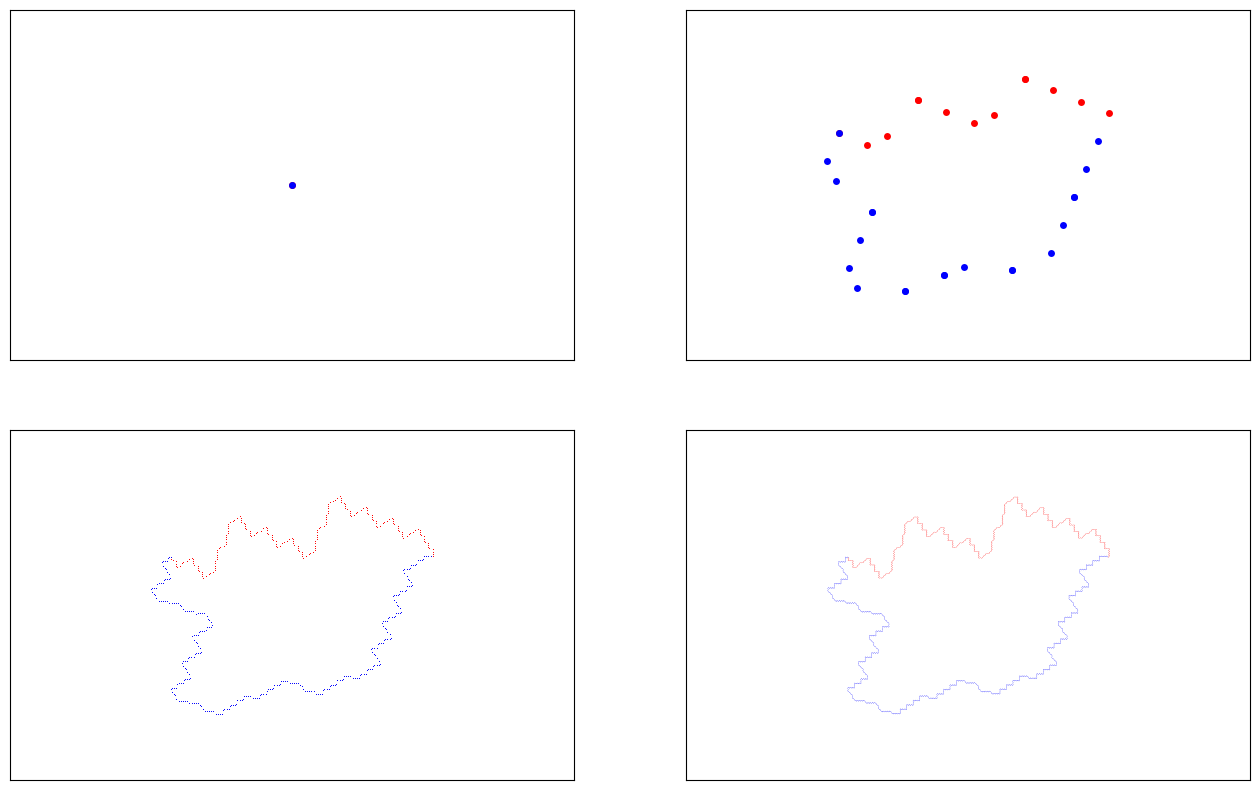

In [8]:
L = np.array([[3, -2], [2, 3]])
L_inv = np.linalg.inv(L)

num_vertices = 4 

edges = { 
    1: [(3, (L_inv @ R @ R, zero)),
        (3, (L_inv @ R @ R, L_inv @ (e1+e2))),
        (1, (L_inv, L_inv @ (2*e1+2*e2)))],
    2: [(3, (L_inv @ R, zero)),
        (2, (L_inv, L_inv @ (e1-e2))),
        (4, (L_inv @ R @ R, L_inv @ (2*e1 - e2))),
        (1, (L_inv @ R_inv, L_inv @ (3*e1 + e2))), 
        (1, (L_inv @ R, L_inv @ (3*e1 + e2)))],
    3: [(3, (L_inv, zero)),
        (2, (L_inv @ R_inv, L_inv @ (-e1-e2))),
        (4, (L_inv @ R, L_inv @ (-e1-2*e2) )), 
        (2, (L_inv @ R, L_inv @ (-4*e2))),
        (3, (L_inv, L_inv @ (-4*e2)))],
    4: [(1, (L_inv @ R, L_inv @ (-e2))),
        (1, (L_inv @ R_inv, L_inv @ (-e2))),
        (4, (L_inv, L_inv @ (-2*e2))),
        (1, (L_inv @ R, L_inv @ (-1*e1-4*e2))),
        (1, (L_inv @ R_inv, L_inv @ (-1*e1-4*e2)))]
}

boundary_IFS = GraphDirectedIFS(d, num_vertices, edges) 

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Plot iterations
iters = [0, 1, 2, 3]
markers = [100, 100, 2, 0.05] # marker sizes
for i, ax in zip(iters, axes):
    boundary_IFS.draw(vertex=1, iter=2*i, ax=ax, marker='.', s = markers[i], linewidths=0, color='red')
    boundary_IFS.draw(vertex=2, iter=2*i, ax=ax, marker='.', s= markers[i], linewidths=0, color='blue')
    ax.set_xticks([]); ax.set_yticks([])
    ax.margins(0.5)
    ax.axis('equal')

plt.show()
fig.savefig(f"{outdir}/graph-direct construction.jpg", dpi = 400, bbox_inches='tight') 

Observe that the graph $G_\sigma$ is strongly connected. We compute its sim-value below and thus the Hausdorff dimension of the boundary of our plane-filling curve.

In [9]:
M = s.boundary_morphism_adjacency_matrix() # returns a numpy matrix
sp_M = sp.Matrix(M) # a sympy matrix
char_poly = sp_M.charpoly(x) # compute characteristic polynomial
rho_M = max(abs(np.linalg.eigvals(M))) # spectral radius float
(x1,x2) = end_squaregrid_word(s.folding_morphism('A')) # end(P(A))
c = sp.sqrt(x1**2 + x2**2) # length of end vector
a = np.log(rho_M)/np.log(float(c)) # sim-value

# display results
display(Latex(f"The adjacency matrix is given by $M_{{G_{{\sigma}}}} = {sp.latex(sp_M)}$."))
display(Latex(f"Its characteristic polynomial is given by $\det(M_{{G_{{\sigma}}}} - x I) = {sp.latex(char_poly.as_expr())}$."))
display(Latex(f"The spectral radius of $M_{{G_{{\sigma}}}}$ is the largest root of this characteristic polynomial which is given by $\\rho(M_{{G_{{\sigma}}}}) \\approx {rho_M:.6f}$."))
display(Latex(
    f"We have $\\text{{end}}(P_\sigma(\\texttt{{A}}))=({x1}, {x2})^t$ so $c:=\Vert \\text{{end}}(P_\sigma(\\texttt{{A}})) \Vert = {sp.latex(c)}.$"))
display(Latex(f"Thus the sim-value of $G_{{\sigma}}$ is given by $\\alpha_{{G_\\sigma}} \\approx {a:.6f}$."))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Theorem 1 yields $\dim_H \left( K_{{\texttt{R}}}\right) =  \dim_H \left( K_{{\texttt{L}}}\right) = \alpha_{G_\sigma}$

### Example 3 (right-angled triangle, $\sigma = \texttt{+$\,$-$\,$-}$)

In [10]:
#ensure folder exists
outdir = "output/example3"
os.makedirs(outdir, exist_ok=True)

# define folding sequence
s = FoldingSequence('-++')

display(Latex('The associated boundary morhpishm:'))
for a in ["R", "r", "L", "l", "S", "s"]:
    rhs = "".join(s.boundary_morphism(a))
    display(Latex(f"$\\texttt{{{a}}}\mapsto\\texttt{{{rhs}}}$"))
print("\n")

#render sqaure grid folding curves as SVG files
iter_list = [0,1,2,3,5,7] # iterations to display
filenames = [] # collect the rendered SVG paths
step = 100 # length of forward one step
width = 1 # pen width
rounded_corners = 0.1 # turning radius as fraction of step
for i in iter_list:
    filename = f"{outdir}/{i}scaled.svg"
    s.turtledraw_foldingcurve(i, step=step, curve_width = width, draw_boundary=True, filename=filename, rounded_corners=rounded_corners, arrow_head=(i<=2))
    filenames.append(filename)
    
# display in Markdown table
header = "| $i=$ " + "".join(f"| ${i}$" for i in iter_list) + "|\n"
sep = "|" + "|".join(["---"] * (len(iter_list)+1)) + "|\n"
row1 = "| $L_\sigma^{-i}\\tilde{\mathcal{C}}(P_\sigma^i (\\texttt{A})) \cup L_\sigma^{-i}\\tilde{\mathcal{C}}(Q_\sigma^i (\\texttt{R})) \cup L_\sigma^{-i}\\tilde{\mathcal{C}}(Q_\sigma^i (\\texttt{L}))$ " + "".join(f"| ![]({f}) " for f in filenames) + "|\n"

print("Iterates:")
md = header + sep + row1
display(Markdown(md))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>



Iterates:


| $i=$ | $0$| $1$| $2$| $3$| $5$| $7$|
|---|---|---|---|---|---|---|
| $L_\sigma^{-i}\tilde{\mathcal{C}}(P_\sigma^i (\texttt{A})) \cup L_\sigma^{-i}\tilde{\mathcal{C}}(Q_\sigma^i (\texttt{R})) \cup L_\sigma^{-i}\tilde{\mathcal{C}}(Q_\sigma^i (\texttt{L}))$ | ![](output/example3/0scaled.svg) | ![](output/example3/1scaled.svg) | ![](output/example3/2scaled.svg) | ![](output/example3/3scaled.svg) | ![](output/example3/5scaled.svg) | ![](output/example3/7scaled.svg) |


We observe that the boundary curves satisfy the following graph-similarity equation
$$\begin{align*}
    L_\sigma K_R &= R_{\pi} K_S \cup \left(K_R + (1,1)^t\right) \cup \left( R_{\pi/2} K_L + (2,0)^t \right) \\
    L_{\sigma} K_L &= K_{L} \cup \left(R_{\pi}K_L + (2,0)^{t}\right) \\
    L_{\sigma} K_S &= K_S \cup \left(K_S + (-1,-1)^t \right).
\end{align*}$$ 

We demonstrate below that we can generate the $K_v$ starting from an initial vector of sets solely containing the origin, following the contraction mapping principle.

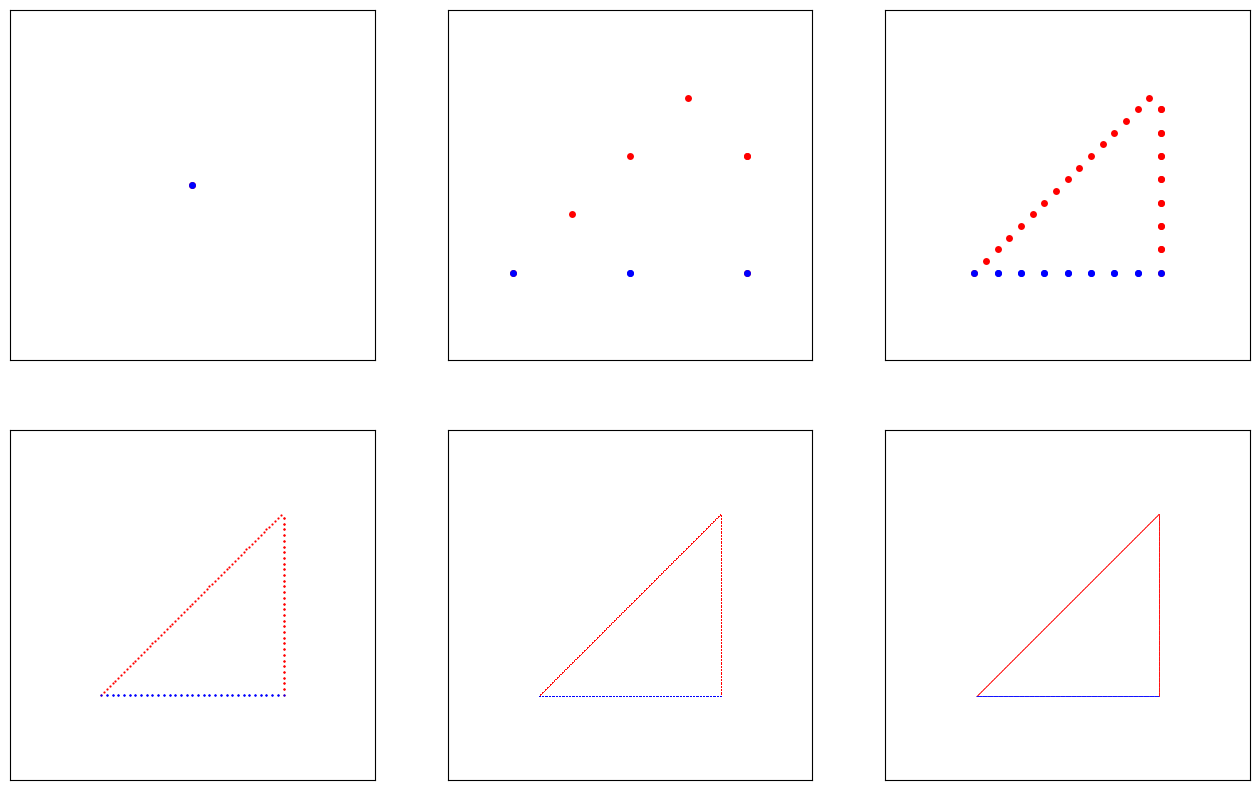

In [11]:
L = np.array([[2, 0], [0, 2]])
L_inv = np.linalg.inv(L)

num_vertices = 3

edges = { 
    1: [(3, (L_inv @ R @ R, zero)),
        (1, (L_inv, L_inv @ (e1+e2))),
        (2, (L_inv @ R, L_inv @ (2*e1)))],
    2: [(2, (L_inv, zero)),
        (2, (L_inv @ R @ R, L_inv @ (2*e1)))],
    3: [(3, (L_inv, zero)),
        (3, (L_inv, L_inv @ (-e1-e2)))]
}

boundary_IFS = GraphDirectedIFS(d, num_vertices, edges) 

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Plot iterations
iters = [0, 1, 2, 3, 4, 5]
markers = [100, 100, 100, 10, 2, 0.5] # marker sizes
for i, ax in zip(iters, axes):
    boundary_IFS.draw(vertex=1, iter=2*i, ax=ax, marker='.', s = markers[i], linewidths=0, color='red')
    boundary_IFS.draw(vertex=2, iter=2*i, ax=ax, marker='.', s= markers[i], linewidths=0, color='blue')
    ax.set_xticks([]); ax.set_yticks([])
    ax.margins(0.5)
    ax.axis('equal')

plt.show()
fig.savefig(f"{outdir}/graph-direct construction.jpg", dpi = 400, bbox_inches='tight') 

The strongly connected components of $G_{\sigma}$ are $H_1 = \{\texttt{R}\}$, $H_2 = \{\texttt{L}\}$ and $H_3 = \{\texttt{S}\}$. In terms of their order structure, $H_2$ and $H_3$ are absorbing and thus incomparable, while they are both accesible from $H_1$. Below, we compute the adjacency matrices and sim-values for these SCCs.

In [12]:
# compute and dispay adjacency matrices and spectral radii
M1 = s.boundary_morphism_adjacency_matrix(['R'])
M2 = s.boundary_morphism_adjacency_matrix(['L'])
M3 = s.boundary_morphism_adjacency_matrix(['S'])
rho_M1 = max(abs(np.linalg.eigvals(M1)))
rho_M2 = max(abs(np.linalg.eigvals(M2)))
rho_M3 = max(abs(np.linalg.eigvals(M3)))
display(Latex(f"Their adjacency matrices are given by $M_{{H_1}} = {sp.latex(sp.Matrix(M1))}$, $M_{{H_2}} = {sp.latex(sp.Matrix(M2))}$ and $M_{{H_3}} = {sp.latex(sp.Matrix(M3))}$."))
display(Latex(f"These have spectral radii ${rho_M1:.0f}$, ${rho_M2:.0f}$ and ${rho_M3:.0f}$ respectively."))

#compute and display scaling factor
(x1,x2) = end_squaregrid_word(s.folding_morphism('A')) # end(P(A))
c = sp.sqrt(x1**2 + x2**2) # length of end vector
display(Latex(
    f"We have $\\text{{end}}(P_\sigma(\\texttt{{A}}))=({x1}, {x2})^t$ so $c:=\Vert \\text{{end}}(P_\sigma(\\texttt{{A}})) \Vert = {sp.latex(c)}.$"))

# compute sim-values
a1 = np.log(rho_M1)/np.log(float(c))
a2 = np.log(rho_M2)/np.log(float(c)) 
a3 = np.log(rho_M3)/np.log(float(c))
display(Latex(f"Thus their sim-values are given by ${a1:.0f}, {a2:.0f}$ and {a3:.0f} respectively."))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Theorem 1 yields $\dim_H(K_{\texttt{L}}) = \alpha_{H_2} = 1$ and $\dim_H(K_{\texttt{R}}) = \max\{\alpha_{H_2}, \alpha_{H_3}\} = 1$.

### Example 4 (Dekking's symmetric 5-fold, $\sigma = \texttt{+$\,$+$\,$-$\,$-}$)

We say that $\sigma \in \{\texttt{+}, \texttt{-} \}^*$ is **symmetric** if $\sigma = \texttt{Invert}(\sigma)$. Dekking provided a formula for the Hausdorff dimension of the boundary of a square-grid folding curve generated by a symmetric self-avoiding plane-filling folding sequence (see [Theorem 7, 4]) and considered the following example.

In [13]:
#ensure folder exists
outdir = "output/example4"
os.makedirs(outdir, exist_ok=True)

# define folding sequence
s = FoldingSequence('++--')

display(Latex('The associated boundary morhpishm:'))
for a in ["R", "r", "L", "l", "S", "s"]:
    rhs = "".join(s.boundary_morphism(a))
    display(Latex(f"$\\texttt{{{a}}}\mapsto\\texttt{{{rhs}}}$"))
print("\n")

#render sqaure grid folding curves as SVG files
iter_list = [0,1,2,3,4,5] # iterations to display
filenames = [] # collect the rendered SVG paths
step = 100 # length of forward one step
width = 1 # pen width
rounded_corners = 0.1 # turning radius as fraction of step
for i in iter_list:
    filename = f"{outdir}/{i}scaled.svg"
    s.turtledraw_foldingcurve(i, step=step, curve_width = width, draw_boundary=True, filename=filename, rounded_corners=rounded_corners, arrow_head=(i<=2))
    filenames.append(filename)
    
# display in Markdown table
header = "| $i=$ " + "".join(f"| ${i}$" for i in iter_list) + "|\n"
sep = "|" + "|".join(["---"] * (len(iter_list)+1)) + "|\n"
row1 = "| $L_\sigma^{-i}\\tilde{\mathcal{C}}(P_\sigma^i (\\texttt{A})) \cup L_\sigma^{-i}\\tilde{\mathcal{C}}(Q_\sigma^i (\\texttt{R})) \cup L_\sigma^{-i}\\tilde{\mathcal{C}}(Q_\sigma^i (\\texttt{L}))$ " + "".join(f"| ![]({f}) " for f in filenames) + "|\n"

print("Iterates:")
md = header + sep + row1
display(Markdown(md))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>



Iterates:


| $i=$ | $0$| $1$| $2$| $3$| $4$| $5$|
|---|---|---|---|---|---|---|
| $L_\sigma^{-i}\tilde{\mathcal{C}}(P_\sigma^i (\texttt{A})) \cup L_\sigma^{-i}\tilde{\mathcal{C}}(Q_\sigma^i (\texttt{R})) \cup L_\sigma^{-i}\tilde{\mathcal{C}}(Q_\sigma^i (\texttt{L}))$ | ![](output/example4/0scaled.svg) | ![](output/example4/1scaled.svg) | ![](output/example4/2scaled.svg) | ![](output/example4/3scaled.svg) | ![](output/example4/4scaled.svg) | ![](output/example4/5scaled.svg) |


Note the neither $\texttt{S}$ nor $\texttt{s}$ is reachable from $\texttt{R}$ or $\texttt{L}$. We have the following graph self-similarity equation
$$\begin{align*}
    L_\sigma K_R &= K_R \cup \left(R_{\pi/2} K_L + (1,-1)^t\right) \cup \left( R_{-\pi/2} K_L + (1,-1)^t \right) \\
    L_\sigma K_L &= R_{-\pi/2} K_R \cup \left(R_{\pi/2} K_R + (0,-2)^t \right) \cup \left( K_L + (0, -2)^t  \right).
\end{align*}$$ 

We demonstrate below that we can generate the $K_v$ starting from an initial vector of sets solely containing the origin, following the contraction mapping principle.

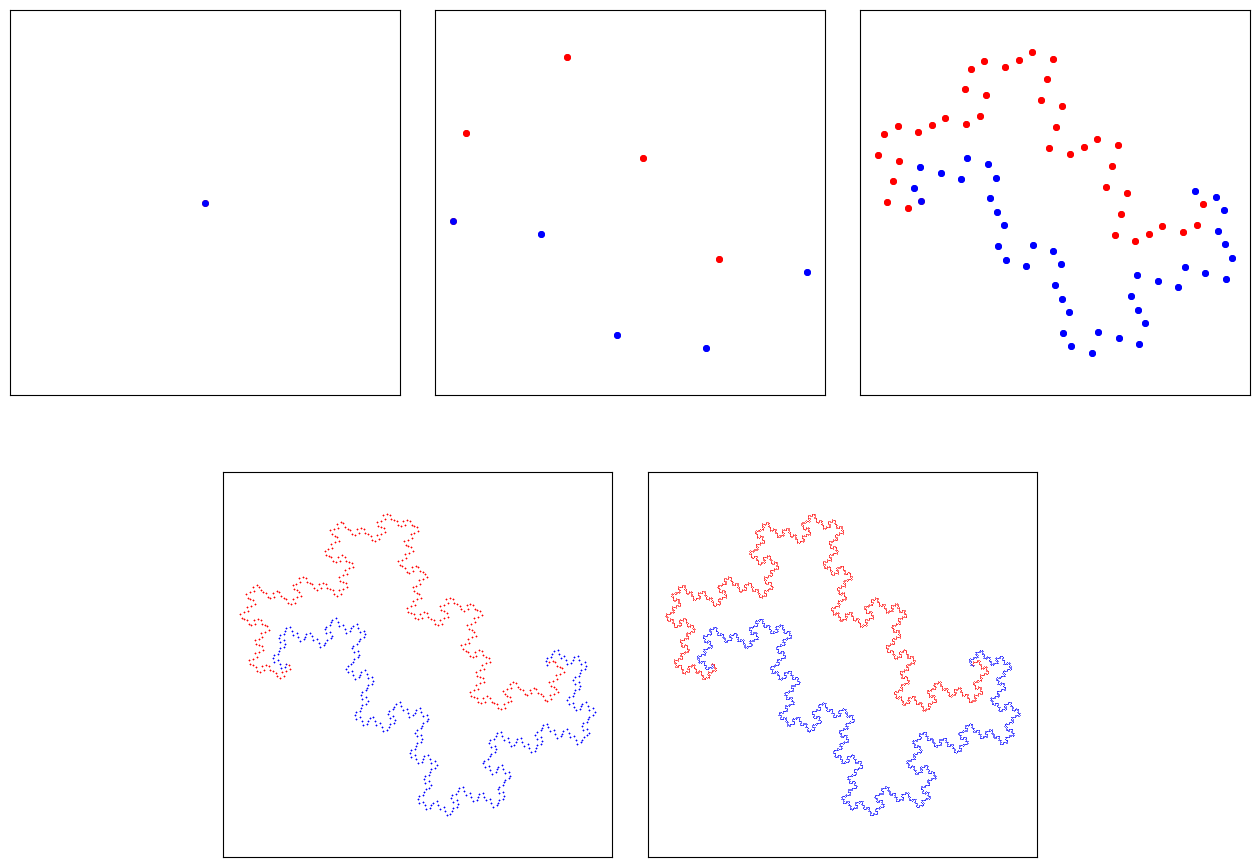

In [14]:
L = np.array([[1, 2], [-2, 1]])
L_inv = np.linalg.inv(L)

num_vertices = 2

edges = { 
    1: [(1, (L_inv, zero)),
        (2, (L_inv @ R, L_inv @ (e1-e2))),
        (2, (L_inv @ R_inv, L_inv @ (e1-e2)))],
    2: [(1, (L_inv @ R_inv, zero)),
        (1, (L_inv @ R, L_inv @ (-2*e2))),
        (2, (L_inv, L_inv @ (-2*e2)))],
}

boundary_IFS = GraphDirectedIFS(d, num_vertices, edges) 

# Plot iterations
layout = """
AABBCC
.DDEE.
""" # desired order: 3 on top, 2 centered below
fig, axes = plt.subplot_mosaic(layout, figsize=(16, 11)) 
index = ['A', 'B', 'C', 'D', 'E']
iters   = [0, 1, 2, 3, 4]
markers = [100, 100, 100, 5, 0.5] # marker sizes

for i, key in zip(iters, index):
    ax = axes[key]
    boundary_IFS.draw(vertex=1, iter=2*i, ax=ax, marker='.', s=markers[i],
                      linewidths=0, color='red')
    boundary_IFS.draw(vertex=2, iter=2*i, ax=ax, marker='.', s=markers[i],
                      linewidths=0, color='blue')
    ax.set_xticks([]); ax.set_yticks([])
    ax.axis('equal')
    ax.margins(0.05)  # small margin works better with equal aspect

# save 
fig.savefig(f"{outdir}/graph-directed_construction.jpg", dpi=400, bbox_inches='tight')
plt.show()

The strongly connected components of $G_{\sigma}$ are given by $H_1 = \{\texttt{R}, \texttt{L}\}$ and $H_2 = \{ \texttt{S}, \texttt{s}\}$. We have that $H_1$ is accessible from $H_2$ while $H_1$ is absorbing.  Below, we compute the adjacency matrices and sim-values for these SCCs. 

In [15]:
# compute and dispay adjacency matrices and spectral radii
M1 = s.boundary_morphism_adjacency_matrix(['R', 'L'])
M2 = s.boundary_morphism_adjacency_matrix(['S', 's'])
rho_M1 = max(abs(np.linalg.eigvals(M1)))
rho_M2 = max(abs(np.linalg.eigvals(M2)))
display(Latex(f"Their adjacency matrices are given by $M_{{H_1}} = {sp.latex(sp.Matrix(M1))}$ and $M_{{H_2}} = {sp.latex(sp.Matrix(M2))}$."))
display(Latex(f"These have spectral radii ${rho_M1:.0f}$ and ${rho_M2:.0f}$ respectively."))

#compute and display scaling factor
(x1,x2) = end_squaregrid_word(s.folding_morphism('A')) # end(P(A))
c = sp.sqrt(x1**2 + x2**2) # length of end vector
display(Latex(
    f"We have $\\text{{end}}(P_\sigma(\\texttt{{A}}))=({x1}, {x2})^t$ so $c:=\Vert \\text{{end}}(P_\sigma(\\texttt{{A}})) \Vert = {sp.latex(c)}.$"))

# compute sim-values
a1 = np.log(rho_M1)/np.log(float(c))
a2 = np.log(rho_M2)/np.log(float(c)) 
display(Latex(f"Thus their sim-values $\\alpha_{{H_1}}, \\alpha_{{H_2}}$ are given by ${a1:.6f},{a2:.0f}$ respectively."))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Theorem 1 yields $\dim_H \left( K_{{\texttt{R}}}\right) =  \dim_H \left( K_{{\texttt{L}}}\right) = \alpha_{H_1}$ (cf. [p. 35, 4]).

## 3. Conclusion

For a self-avoiding plane-filling folding sequence $\sigma$, we define an IFS realising a graph $G_\sigma$ on the vertex set $V = \{\texttt{R}, \texttt{L}, \texttt{S}, \texttt{s}\}$ such that $K_\texttt{R} \cup K_\texttt{L}$ is the boundary of the square-grid folding curve generated by $\sigma$, where $(K_v)_{v\in V}$ denotes the attractor of this IFS. We show that this IFS satisfies the open set condition and hence, by Theorem 1, $\dim_H (K_{v}) = \alpha_v$ for each $v \in V$. We have illustrated this computation for a few examples.

The following questions remain open or only partially resolved, and are proposed for further investigation.
1. How does our formula generalise Dekking's formula for symmetric folds? Dekking's statement involved the number of boundary points but we did not clarify how the spectral radii of our adjacency matrices relate with this value.
3. Is it always true that $\alpha_\texttt{R} = \alpha_\texttt{L}$ even when $\texttt{R}, \texttt{L}$ do not lie in the same SCC of $G_{\sigma}$?
2. In all the examples we consider, $\max\{\alpha_\texttt{R}, \alpha_\texttt{L}\} = \log(\rho(M_{G_\sigma}))/\log(\Vert \text{end}(P_{\sigma}(\texttt{A})) \Vert)$. Is this always the case or is it possible that there is some SCC of $G_{\sigma}$ that is neither accesible from $\texttt{R}$ nor $\texttt{L}$ yet has a striclty larger sim-value than any SCC accesible from them?
4. Are the elements of $\{H \in \text{SC}(G_{\sigma}) \mid \text{$H$ is accessible from $\texttt{R}$ or $\texttt{L}$ and } \alpha_H = \max \{\alpha_{\texttt{R}}, \alpha_{\texttt{L}} \} \}$ always incomparable?
5. How does this framework extend when we unfold the strip at angles other that $90^{\circ}$?

## References

[1] H. A. Verrill, ‘L-systems for the boundaries of plane-filling folding curves’, Theoretical Computer Science, vol. 1049, p. 115363, Sept. 2025, doi: 10.1016/j.tcs.2025.115363.

[2] M. Dekking, ‘Paperfolding morphisms, planefilling curves, and fractal tiles’, Theoretical Computer Science, vol. 414, no. 1, pp. 20–37, Jan. 2012, doi: 10.1016/j.tcs.2011.09.025.

[3] R. D. Mauldin and S. C. Williams, ‘Hausdorff dimension in graph directed constructions’, Trans. Amer. Math. Soc., vol. 309, no. 2, pp. 811–829, 1988, doi: 10.1090/S0002-9947-1988-0961615-4.

[4] G. A. Edgar, Measure, topology, and fractal geometry. in Undergraduate texts in mathematics. New York: Springer-Verlag, 1990.

[5] F. M. Dekking, ‘Recurrent sets’, Advances in Mathematics, vol. 44, no. 1, pp. 78–104, Apr. 1982, doi: 10.1016/0001-8708(82)90066-4.

[6] R. S. Strichartz, Y. Wang, J. Li, and R. Kenyon, ‘Geometry of self-affine tiles I’, Indiana Univ. Math. J., vol. 48, no. 1, pp. 0–0, 1999, doi: 10.1512/iumj.1999.48.1612.

[7] P. Duvall, J. Keesling, and A. Vince, ‘The Hausdorff Dimension of the Boundary of a Self-Similar Tile’, Journal of the London Mathematical Society, vol. 61, no. 3, pp. 748–760, June 2000, doi: 10.1112/s0024610700008711.

[8] Arndt and J. Handl, ‘Edge-covering plane-filling curves on grid colorings: a pedestrian approach’, Dec. 01, 2023, arXiv: arXiv:2312.00654. doi: 10.48550/arXiv.2312.00654.

[9] O.M. Fagbile, Github repository, https://github.com/omfagbile/FoldingCurves, 2025.